In [114]:
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re  
import requests
from bs4 import BeautifulSoup
from matplotlib.patches import Circle

import unicodedata
from PIL import Image
import requests
from io import BytesIO
import tkinter as tk
from tkinter import Label
from PIL import Image, ImageTk
from io import BytesIO
import threading
from IPython.display import display

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HTML, VBox, HBox, Dropdown, FloatRangeSlider, IntSlider, Checkbox, Layout, Output, Label
from ipywidgets import Output, HBox, VBox, Checkbox, Layout, Label, IntRangeSlider
from matplotlib.lines import Line2D

import seaborn as sns

In [38]:
df=pd.read_csv('..\Datos\datos_subastas_procesado.csv')
Artistas=pd.read_csv('..\Datos\Artistas.csv')
Subastas=pd.read_csv('..\Datos\Subastas.csv')

In [39]:
min_year = int(df['Año de nacimiento'].min())
max_year = int(df['Año de nacimiento'].max())

# Filtrar advertencias específicas
warnings.filterwarnings("ignore")

graf_output = Output()


def representar_obras_y_artistas_por_paises(intervalo_años):
    
    Años = range(intervalo_años[0], intervalo_años[1] , 1) 
    
    Paises = list(Artistas['País'].unique())
    Paises.remove('Desconocido')# Intervalo de años basado en el slider
    
    idxFilasArt = [list(Artistas.loc[(Artistas['País'] == pais) & 
                                       (Artistas['Año de nacimiento'].isin(Años))].index) for pais in Paises]
    idxFilasOb = [list(df.loc[(df['País'] == pais) & 
                               (df['Año de nacimiento'].isin(Años))].index) for pais in Paises]

    graf_paisesob =[[ pais, len(idxFilasOb[i]), sum( df.loc[ j , 'Vendido'] for j in idxFilasOb[i]) ] for i, pais in enumerate(Paises)]
    graf_paisesart =[[ pais , len(idxFilasArt[i]), sum((1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i])]  for i, pais in enumerate(Paises)] 

    graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
    graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

    graf_paisesob = graf_paisesob [:10]
    graf_paisesart = graf_paisesart [:10]

    obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
    obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
    ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

    artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
    artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
    conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]
    
    with graf_output:
        
        graf_output.clear_output(wait=True)
        
        fig = plt.figure(figsize=(18, 10))
        gs = fig.add_gridspec(9, 8)

        ax1 = fig.add_subplot(gs[:4, :5])
        ax2 = fig.add_subplot(gs[5:, :5])
        ax3 = fig.add_subplot(gs[0, 5:])
        ax4 = fig.add_subplot(gs[1:5, 5:])

        ax5 = fig.add_subplot(gs[6:,5:])


        sns.set_color_codes("pastel")
        sns.barplot(y=obras_y, x=obras_x, ax=ax1, color='grey', alpha=1, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
        sns.barplot(y=obras_y, x=ventas_x, ax=ax1, color='brown',alpha=1, edgecolor='black', label='Ventas por país')
        # Configurar el gráfico
        ax1.set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax1.set_xlim(0, max(obras_x)*1.05)

        ax1.set_xticks([0 ,np.array(obras_x).mean(), max(obras_x)])
        
        labels = ax1.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax1.set_yticklabels(labels)
        
        sns.despine(right=True, top=True)
        

        ax1.axvline(np.mean(obras_x), linestyle='--', color='black', linewidth=1.2)  # Media de obras
        ax1.axvline(np.quantile(obras_x, 0.25), linestyle='--', color='black', linewidth=0.5) 
        ax1.axvline(np.quantile(obras_x, 0.75), linestyle='--', color='black', linewidth=0.5) 

        ax1.legend()


        # Plotear la cantidad total de artistas por país
        sns.set_color_codes("pastel")
        sns.barplot(y=artistas_y, x=artistas_x, ax=ax2, color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
        sns.barplot(y=artistas_y, x=conocido_x, ax=ax2, color='brown', edgecolor='black', label='Artistas con más de una obra') 
        # Configurar el gráfico
        ax2.set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax2.set_xlim(0, max(artistas_x)*1.05)
        
        labels = ax2.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax2.set_yticklabels(labels)
        
        
        sns.despine(right=True, top=True)
        
        ax2.axvline(np.mean(artistas_x), linestyle='--', color='black', linewidth=1.2)

        ax2.set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])


        idxFilasObperiodo = list(df.loc[(df['Año de nacimiento'].isin(Años)) & (df['Vendido'] == 1)].index)

        # Encuentra la obra más cara vendida
        if not idxFilasObperiodo:
            print("No hay obras vendidas en el intervalo seleccionado.")
                

        obra_index = max(idxFilasObperiodo, key=lambda x: df.loc[x, 'Precio_num'])  # Obtener el índice de la obra más cara
        obra = df.iloc[obra_index] 



        ax3.set_title("Pintura más cara de este periodo:", fontsize=20, fontweight='bold', loc='left')

        # Eliminar ejes
        ax3.axis('off')  # Esto quita todos los ejes para que no haya recuadro

        # Texto sobre la obra
        ax3.text(0, 0.7, f"{obra['Nombre']}, {int(obra['Año de nacimiento'])}, {obra['País']}. {obra['Género']}.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.45, f"{obra['Medio']} sobre {obra['Soporte']} de {round(obra['Alto'],2)} x {round(obra['Ancho'],2)} cm.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.1, f"Vendida en {obra['Ciudad']} el {obra['Fecha']} por {int(obra['Precio_num'])} €.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)

        response = requests.get(obra['URL imagen'])
        if response.status_code == 200:  # Verificar si la solicitud tuvo éxito
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            ax4.imshow(image)
            ax4.axis('off')  # Quitar el eje
        else:
            print("Error al cargar la imagen.")

 

        Generos = list(df['Género'].unique())

        idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                                (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

        graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


        for i, genero in enumerate(graf_generos):
                if genero[1] <= 30:
                        graf_generos.remove(genero)


        graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
        preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
        for genero in graf_generos:
                genero[1] = genero[1] - genero[2]
                genero[3] = genero[3]/preciomedio

        sectores=[]
        for  i,genero in enumerate(graf_generos):
        
                sectores.append([genero[0], genero[2], genero[3]])
                sectores.append([" ", genero[1], 1])
        

        etiquetas = [sector[0] for i,sector in enumerate(sectores)]
        valores = [sector[1] for i,sector in enumerate(sectores)]                                              
        radios = [sector[2] for i,sector in enumerate(sectores)] 

        valortotal = sum(valores)

        max_radio=max(radios)
        radios=[(radio/(max_radio)  if i % 2 == 0 else 1) for i, radio in enumerate(radios)]


        ax5.set_title("Obras según el género", fontsize=20, fontweight='bold', loc='left', pad=20)

        cmap = plt.colormaps["tab20c"]
        inner_colors = cmap(range(len(etiquetas)))  




        for i, genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
                        colores=[(1, 1, 1, 0), inner_colors[2*i], (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7, colors=colores,
                        
                wedgeprops=dict(width=0.35,edgecolor=None, linewidth=0))
        
        for i, genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i +1]).sum(), valores[2*i +1], np.array(valores[2*i+2:]).sum()])
                        colores=[(1, 1, 1, 0), 'orange', (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7, colors=colores,
                        
                wedgeprops=dict(width=0.35,edgecolor=None, linewidth=0))
        
        for i, genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
                        etiq=[None, etiquetas[2*i], None]
                        colores=[(1, 1, 1, 0), inner_colors[2*i + 1], (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7 + radios[2*i]/2, colors=colores,
                        
                wedgeprops=dict(width=radios[2*i]/2 ,edgecolor=None, linewidth=0), labels=etiq)
        
        
        acum_angle = 0
        for i in range(len(graf_generos)):

                ax5.plot(
                        [0.35 * np.cos(acum_angle),(0.7 + radios[2*i]/2 )* np.cos(acum_angle)],
                        [0.35 * np.sin(acum_angle), (0.7 + radios[2*i]/2 )* np.sin(acum_angle)],
                        color='black', linestyle='--', linewidth=0.7
                )

                # Sumar el ángulo al acumulado para la próxima iteración
                acum_angle += (valores[2*i])/ valortotal * 2 * np.pi
                
                # Dibujar la línea radial usando el ángulo acumulado
                ax5.plot(
                        [0.35 * np.cos(acum_angle), (0.7 + radios[2*i]/2 )* np.cos(acum_angle)],
                        [0.35 * np.sin(acum_angle), (0.7 + radios[2*i]/2 )* np.sin(acum_angle)],
                        color='black', linestyle='--', linewidth=0.7
                )

                # Sumar el ángulo al acumulado para la próxima iteración
                acum_angle += (valores[2*i + 1])/ valortotal * 2 * np.pi 
        
        
        
        circle1 = Circle((0, 0), 0.7, color='black', fill=False, linewidth=0.8, linestyle='--')
        circle2 = Circle((0, 0), 0.35, color='black', fill=False, linewidth=0.8, linestyle='--')

        ax5.add_patch(circle1)
        ax5.add_patch(circle2)
        
        
        etiquetas_leyenda = ['Amplitud ~ Nº obras', 'Radio exterior ~ precio medio', 'No vendidas']

        leyenda_entries = [
        Line2D([0], [0], marker='*',color='none',  markerfacecolor='black'), 
        Line2D([0], [0], marker='*',color='none',  markerfacecolor='black') ,
        Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', markersize=10)  # No vendidas (naranja)
        ]

        # Añadir la leyenda personalizada al gráfico
        ax5.legend(leyenda_entries, etiquetas_leyenda, loc='center left', bbox_to_anchor=(1, -0.1), fontsize='small')



        plt.tight_layout(h_pad= 30, w_pad=20)
        plt.show()


# Crear el control deslizante para el rango de años
year_range_slider = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='60%')  
)



def update_plot(year_range):
    start_year, end_year = year_range
    representar_obras_y_artistas_por_paises((start_year, end_year))

year_range_slider.observe(lambda change: update_plot(year_range_slider.value), names='value')


display(VBox([graf_output, year_range_slider],layout=Layout(margin='30px 0px 30px 0px')) )


update_plot(year_range_slider.value)
        


In [40]:
def representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, intervalo_años):

    graf_Años = pd.DataFrame(columns=['Año', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioMv', 'PrecioMs'])
    min_año = int(df['Año de nacimiento'].min())
    max_año = int(df['Año de nacimiento'].max()) 
    
    rango=(intervalo_años[1]-intervalo_años[0])/15
    rango=int(rango)
    
    Años = range(intervalo_años[0] + rango, intervalo_años[1] - rango + 1, (int(rango/8) if rango >= 8 else 1))
    
    idxFilas = [list(df.loc[(abs(df['Año de nacimiento'] - año) <= rango) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in Años]
    
    
    idFilas = [list(df.loc[(df['Año de nacimiento'] == año) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in range(intervalo_años[0], intervalo_años[1] + 1)]
    
    TObras = []
    TVentas = []   
    PrecioMv = [] 
    PrecioMs = []    
    MaxEst = []    
    MinEst = []
    
    graf_Años['Año'] = Años
    
    for i, año in enumerate(graf_Años['Año']):
        
        TObras.append((len(idxFilas[i]) if len(idxFilas[i]) > 0 else 1)/(2*rango))
        TVentas.append((sum(df.loc[j, 'Vendido'] for j in idxFilas[i]) if sum(df.loc[j, 'Vendido'] for j in idxFilas[i]) > 0 else 1)/(2*rango))
        
        PrecioMv.append(round(sum((df.loc[j, 'Precio_num'] if df.loc[j, 'Vendido']==1 else 0) for j in idxFilas[i]) /(2*rango* TVentas[i]), 2) if TVentas[i] > 0 else 0 )
        PrecioMs.append(round(sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)        
        MaxEst.append(round(sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        MinEst.append(round(sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        
    graf_Años['TObras'] = TObras
    graf_Años['TVentas'] = TVentas
    graf_Años['PrecioMv'] = PrecioMv
    graf_Años['PrecioMs'] = PrecioMs
    graf_Años['MaxEst Medio'] = MaxEst
    graf_Años['MinEst Medio'] = MinEst

    TotalObras = sum(TObras) 
    TotalVentas = sum(TVentas)  
    TotalObrasABS = sum(len(idFilas[i]) for i, año in enumerate(idFilas))
    TotalVentasABS = sum(sum([df.loc[j, 'Vendido'] for j in idFilas[i]]) for i, año in enumerate(idFilas))
    
    Porcentaje = round((TotalVentasABS/TotalObrasABS) * 100, 2) if TotalObrasABS > 0 else 0
    
    PrecioMvGlobal = sum((PrecioMv[i] * TVentas[i] for i in range(len(Años)))) / TotalVentas if TotalVentas > 0 else 0
    PrecioMsGlobal = sum((PrecioMs[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMaxMGlobal = sum((MaxEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMinMGlobal = sum((MinEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    

    with graf_output2:
        graf_output2.clear_output(wait=True)
        
        sns.set_theme(style="white")

        # Crear figura y ejes para dos subgráficos
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 9))

        # Primer gráfico
        axes[0].set_title("Número de obras", fontsize=20, fontweight='bold', loc='left', pad=30)
        sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
        sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

        # Rellenar área entre líneas
        axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15)
        axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.3)

        # Configuración del gráfico
        axes[0].set_xlabel("")
        axes[0].set_ylabel("")
        yticks = axes[0].get_yticks()
        axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])
        axes[0].grid(False)
        axes[0].spines['bottom'].set_color('black')
        axes[0].spines['left'].set_color('black')
        
        # Segundo gráfico
        axes[1].set_title("Precios medios y valores estimados", fontsize=20, fontweight='bold', loc='left', pad=30)

        sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMv", data=graf_Años, label='Precio Medio por venta', color='red', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMs", data=graf_Años, label='medio por subasta', color='blue', ax=axes[1], linewidth=0.7, linestyle='--')
        
        sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])

        
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], color='brown', linewidth=0.5, linestyle='--')
        axes[1].plot([min_año - 10, max_año + 10], [PrecioMvGlobal, PrecioMvGlobal], color='red', linewidth=0.8)
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='brown', linewidth=0.5, linestyle='--')
        
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between([min_año+30, max_año-29], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='limegreen', alpha=0.3)
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between(graf_Años['Año'], graf_Años['PrecioMv'], graf_Años['PrecioMs'], color='blue', alpha=0.3)
        
        axes[1].set_xlim(intervalo_años[0], intervalo_años[1])
        axes[1].set_xlabel("")
        axes[1].set_ylabel("")
        axes[1].set_yticks([graf_Años['PrecioMv'].quantile(0.25), PrecioMvGlobal ,graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].max() ])
        axes[1].grid(False)
        axes[1].spines['bottom'].set_color('black')
        axes[1].spines['left'].set_color('black')

        plt.tight_layout(h_pad=4)
        plt.show()
        
    with totales_output1:
        totales_output1.clear_output(wait=True)
        
        fig, axe = plt.subplots(nrows=4, ncols=1, figsize=(3, 4))
        axe[0].set_title("Totales:", fontsize=20, color='black', fontweight='bold', loc='center', pad=10)
        axe[0].spines['top'].set_visible(False)
        axe[0].spines['bottom'].set_visible(False)
        axe[0].spines['left'].set_visible(False)
        axe[0].spines['right'].set_visible(False)
        axe[0].set_xticks([])
        axe[0].set_yticks([])

        axe[1].set_title(f"Subastadas: {TotalObrasABS}", fontsize=15, color='blue', fontweight='bold', loc='center', pad=10)
        axe[1].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[1].set_ylim(0,1)
        
        axe[1].spines['top'].set_visible(False)
        axe[1].spines['bottom'].set_visible(False)
        axe[1].spines['left'].set_visible(False)
        axe[1].spines['right'].set_visible(False)
        axe[1].set_xticks([])
        axe[1].set_yticks([])


        axe[2].set_title(f"Vendidas: {TotalVentasABS}", fontsize=15, color='red', fontweight='bold', loc='center', pad=10)
        axe[2].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[2].set_ylim(0,1)
        
        axe[2].spines['top'].set_visible(False)
        axe[2].spines['bottom'].set_visible(False)
        axe[2].spines['left'].set_visible(False)
        axe[2].spines['right'].set_visible(False)
        axe[2].set_xticks([])
        axe[2].set_yticks([])

        axe[3].set_title( f"{Porcentaje} %", fontsize=20, color='purple', fontweight='bold', loc='center', pad=10)
        axe[3].plot([0, 1], [1,1], color='black', linewidth=5)
        axe[3].set_ylim(0,1)
        axe[3].spines['top'].set_visible(False)
        axe[3].spines['bottom'].set_visible(False)
        axe[3].spines['left'].set_visible(False)
        axe[3].spines['right'].set_visible(False)
        axe[3].set_xticks([])
        axe[3].set_yticks([])


        plt.tight_layout(h_pad=1)
        plt.show()
        
        
    with totales_output2:
        totales_output2.clear_output(wait=True)
        
        fig, ax1 = plt.subplots(figsize=(3, 4.2))
        ax1.set_title("Promedios globales", fontsize=16, fontweight='bold', loc='center', pad=40)

        # Línea central vertical más gruesa usando plt.plot para ajustar linewidth
        ax1.plot([1.3, 1.3], [EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15], color='black', linewidth=1)

        # Líneas horizontales
        sns.lineplot(x=[1, 1.6], y=[PrecioMvGlobal, PrecioMvGlobal], color='red', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMaxMGlobal, EstMaxMGlobal], color='orange', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMinMGlobal, EstMinMGlobal], color='orange', ax=ax1)

        # Áreas sombreadas
        ax1.fill_between([1.15, 1.45], [EstMinMGlobal, EstMinMGlobal], [EstMaxMGlobal, EstMaxMGlobal], color='orange', alpha=0.4)
        ax1.fill_between([1, 1.6], [PrecioMsGlobal, PrecioMsGlobal], [PrecioMvGlobal, PrecioMvGlobal], color='blue', alpha=0.2)

        ax1.grid(False)

        # Configurar los ejes
        ax1.set_xlim(1, 1.6)
        ax1.set_ylim(min(EstMinMGlobal,PrecioMvGlobal) * 0.75, max(PrecioMvGlobal, EstMaxMGlobal) * 1.15)

        # Ajustar visibilidad de los bordes
        ax1.spines['top'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        # Personalizar el spine derecho
        ax1.spines['right'].set_linestyle('-.')
        ax1.spines['right'].set_linewidth(0.6)
        ax1.spines['left'].set_linestyle('-.')
        ax1.spines['left'].set_linewidth(0.6)

        ax1.set_xticks([])
        ax1.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])
        ax1.set_yticklabels(['Est. Min', 'Est. Max', 'Precio'])
        
        ax2 = ax1.twinx()
        ax2.set_ylim(EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15)

        ax2.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])

        plt.tight_layout()
        plt.show()

# Crear widgets de selección de países y géneros
Paises = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Paises Bajos', 'Francia', 'Reino Unido', 'Italia', 'Austria', 'Suiza', 'Desconocido']
Generos = df['Género'].unique()

# Widgets de selección de países
selectorespais = {pais: Checkbox(value=True, description=pais, layout=Layout(width='auto')) for pais in Paises}
# Widgets de selección de géneros
selectoresgeneros = {genero: Checkbox(value=True, description=genero, layout=Layout(width='auto')) for genero in Generos}

year_range_slider1 = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='95%')  # Aquí puedes ajustar el ancho del slider
)

# Crear etiquetas estilizadas
etiqueta_pais = HTML(value="<h3 style='text-align:center; font-weight:bold;'>País</h3>")
etiqueta_genero = HTML(value="<h3 style='text-align:center; font-weight:bold;'>Género</h3>")

# Contenedor para filtros de país con la etiqueta estilizada
columnapais = VBox([etiqueta_pais] + list(selectorespais.values()), layout=Layout(margin='20px 0 10px 0px' ))

# Contenedor para filtros de género con la etiqueta estilizada
columnagenero = VBox([etiqueta_genero] + list(selectoresgeneros.values()), layout=Layout(margin='0 0 30px 0px' ))

# Crear un contenedor para los filtros organizados en dos columnas
Cajonfiltros = VBox([columnapais, columnagenero], layout=Layout(margin='10px 30px 30px 0px' ))

# Crear un contenedor de salida para el gráfico con margen
graf_output2 = Output(layout=Layout(margin='10px 0 20px 10px'))  # Ajusta el margen izquierdo a tu gusto

totales_output1 = Output(layout=Layout(margin='0 0 10px 0'))
totales_output2 = Output(layout=Layout(margin='10px 0 0 0'))

totales_output = VBox([totales_output1, totales_output2], layout=Layout(margin='50px 5px 20px 5px' ))



def update_plot2(*args):
    paiseselegidos = [pais for pais, checkbox in selectorespais.items() if checkbox.value]
    generoselegidos = [genero for genero, checkbox in selectoresgeneros.items() if checkbox.value]
    representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, year_range_slider1.value)
    
for checkbox in selectorespais.values():
    checkbox.observe(update_plot2, 'value')

for checkbox in selectoresgeneros.values():
    checkbox.observe(update_plot2, 'value')


# Conectar el evento del slider con la función de actualización
year_range_slider1.observe(lambda change: update_plot2(year_range_slider1.value), names='value')


cajacentral = VBox([graf_output2, year_range_slider1 ])



# Mostrar los widgets y el gráfico
display(HBox([Cajonfiltros, cajacentral, totales_output]))

update_plot2()


In [41]:
precios=[]

for i,obra in df.iterrows():
    if obra['Vendido'] == 1:
        precios.append(obra['Precio_num'])

precios=sorted(precios) #almacenamos los precios en una lista ordenada

Total=len(precios) 

min_pre = int(precios[0]) 
max_pre = int(precios[-1])

x_precios = []
y_precios = []

porK = 30

paso = min_pre * porK

x = 0

while precios:
    
    precio=precios[0] 
    num=0
    
    while precio <= x + paso:
        
        num += 1
        try:
            precio=precios.pop(0)
        except:
            break

    y_precios.append(num)
    x_precios.append(x)
    
    x += paso

In [42]:
y_de_trabajo = y_precios

    
rep=1
maxrep=10

coefs=[]
for L in range(1, maxrep + 2):
    coefs.append([(sum( 1/ ( (n + k)**2 ) for k in range( 0, L - n + 1 )) / sum( 1/j for j in range(1, L + 1))) for n in range(1, L + 1) ])

while rep <= maxrep:
    
    L = rep
    y_val = []
   
    for i, x in enumerate(x_precios[:2000]):
        
        valsD = []
        valsI = []
        
        for n in range(1, L+1):
            
            try:
                valsD.append(y_de_trabajo[i+n])
            except:
                pass
            
            try:
                valsI.append(y_de_trabajo[i-n])
            except:
                pass
            
        LD = len(valsD)
        LI = len(valsI)
        vals = []
        
        for j,val in enumerate(valsI):
            vals.append(val*coefs[LI-1][j] * (LD/(LD + LI)))
            
        for j,val in enumerate(valsD):
            vals.append(val*coefs[LD-1][j] * (LI/(LD + LI)))
            
        y_val.append(np.array(vals).sum())
        
        if i > rep:
            idf = rep
            ultimos = y_val[-idf :]
            y_val = y_val[: - idf]
            I_f = sum(ultimos)/paso
            I_0 = sum(y_precios[i - idf + 1: i + 1])/paso
            trozo = (I_0 - I_f)/idf
            for k, ult in enumerate(ultimos):
                nuevo = ult + 2*(idf-k)*trozo
                y_val.append(nuevo)
        

    y_de_trabajo =list(np.array(y_de_trabajo[:2000])*((rep-1)/rep) + np.array( y_val)*(1/rep))
    
    
    rep += 1

print(y_val)

[np.float64(166.10483880433335), np.float64(230.8762706927597), np.float64(269.8907752794773), np.float64(285.03717891072944), np.float64(280.56823778454225), np.float64(264.13778707369437), np.float64(241.1731888329915), np.float64(216.580395030406), np.float64(192.483327851801), np.float64(169.9736231520908), np.float64(149.43118163835672), np.float64(131.36776313267862), np.float64(115.32693651805371), np.float64(101.93876211695756), np.float64(90.01599853499033), np.float64(80.02031969132472), np.float64(71.76061423998134), np.float64(64.1661208524058), np.float64(58.54382292432561), np.float64(53.54084150446476), np.float64(49.480744058277054), np.float64(46.464628059051954), np.float64(43.50476022037542), np.float64(41.65473158921177), np.float64(39.62128558658789), np.float64(37.86812569694257), np.float64(36.373539978085475), np.float64(34.180771375303664), np.float64(32.372134682202265), np.float64(30.295891108902307), np.float64(28.224137835983683), np.float64(26.417253211997

In [43]:
Q1=df[df['Vendido']==1]['Precio_num'].quantile(0.25)
Q3=df[df['Vendido']==1]['Precio_num'].quantile(0.75)
QM=df[df['Vendido']==1]['Precio_num'].mean()
Qm=df[df['Vendido']==1]['Precio_num'].median()
IQR=Q3-Q1
cinf=Q1 - 1.5*IQR
csup=Q3 + 1.5*IQR

Text(0.5, 1.0, 'Distribución de la variable precio de venta')

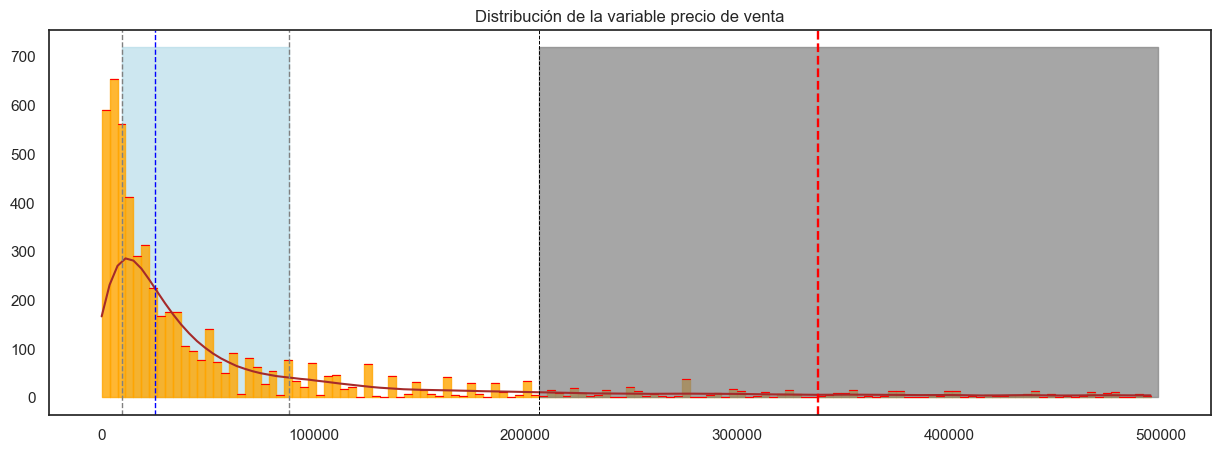

In [44]:
plt.figure(figsize=(15, 5))

plt.fill_between([Q1, Q3], [max(y_precios)*1.1,max(y_precios)*1.1], color='lightblue', alpha=0.6)

for i in range(len(x_precios)):
    try:
        plt.plot([x_precios[:int(4000/porK)][i], x_precios[:int(4000/porK)][i+1]], [y_precios[:int(4000/porK)][i], y_precios[:int(4000/porK)][i]], color='red', linewidth=0.8)
        plt.fill_between([x_precios[:int(4000/porK)][i], x_precios[:int(4000/porK)][i+1]], [y_precios[:int(4000/porK)][i], y_precios[:int(4000/porK)][i]], color='orange', alpha=0.8)
    except:
        break

sns.lineplot(x=x_precios[:int(4000/porK)], y=y_val[:int(4000/porK)], color='brown')

plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)  
plt.axvline(Q3, linestyle='--', color='grey', linewidth=1) 
plt.axvline(QM, linestyle='--', color='red', linewidth=1.7) 
plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)


plt.fill_between([csup, x_precios[int(4000/porK)]], [max(y_precios)*1.1,max(y_precios)*1.1], color='grey', alpha=0.7)

plt.axvline(csup, linestyle='--', color='black', linewidth=0.7) 

# Configuración adicional de la gráfica
plt.title('Distribución de la variable precio de venta')


In [45]:
y_de_trabajo = y_precios

    
rep=1
maxrep=10

coefs=[]
for L in range(1, maxrep + 2):
    coefs.append([(sum( 1/ ( (n + k)**2 ) for k in range( 0, L - n + 1 )) / sum( 1/j for j in range(1, L + 1))) for n in range(1, L + 1) ])

while rep <= maxrep:
    
    L = rep
    y_val = []
   
    for i, x in enumerate(x_precios):
        
        valsD = []
        valsI = []
        
        for n in range(1, L+1):
            
            try:
                valsD.append(y_de_trabajo[i+n])
            except:
                pass
            
            try:
                valsI.append(y_de_trabajo[i-n])
            except:
                pass
            
        LD = len(valsD)
        LI = len(valsI)
        vals = []
        
        for j,val in enumerate(valsI):
            vals.append(val*coefs[LI-1][j] * (LD/(LD + LI)))
            
        for j,val in enumerate(valsD):
            vals.append(val*coefs[LD-1][j] * (LI/(LD + LI)))
            
        y_val.append(np.array(vals).sum())
        
        if i > rep:
            idf = rep
            ultimos = y_val[-idf :]
            y_val = y_val[: - idf]
            I_f = sum(ultimos)/paso
            I_0 = sum(y_precios[i - idf + 1: i + 1])/paso
            trozo = (I_0 - I_f)/idf
            for k, ult in enumerate(ultimos):
                nuevo = ult + 2*(idf-k)*trozo
                y_val.append(nuevo)
        

    y_de_trabajo =list(np.array(y_de_trabajo)*((rep-1)/rep) + np.array( y_val)*(1/rep))
    
    
    rep += 1

print(y_val)

[np.float64(166.07911220251327), np.float64(230.85569831158185), np.float64(269.87618529537434), np.float64(285.0273352597946), np.float64(280.5619004188499), np.float64(264.13397138722604), np.float64(241.17111154911183), np.float64(216.57938290283346), np.float64(192.4828249947478), np.float64(169.97333554976544), np.float64(149.43101073774713), np.float64(131.36767993657335), np.float64(115.32689699240436), np.float64(101.93874392076876), np.float64(90.01599037140839), np.float64(80.02031608696426), np.float64(71.7606126528397), np.float64(64.16612015354123), np.float64(58.543822623708806), np.float64(53.54084138227765), np.float64(49.480744011691165), np.float64(46.46462804183178), np.float64(43.50476021420432), np.float64(41.65473158707341), np.float64(39.62128558588154), np.float64(37.86812569672806), np.float64(36.37353997803032), np.float64(34.18077137529411), np.float64(32.37213468220279), np.float64(30.295891108903763), np.float64(28.224137835984592), np.float64(26.4172532119

In [46]:
window_size = int(4000 / porK)

def update_graph(start_index=0):
    plt.figure(figsize=(15, 5))
    end_index = min(start_index + window_size, len(x_precios))
    
    plt.fill_between([Q1, Q3], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='lightblue', alpha=0.6)

    for i in range(start_index, end_index - 1):
        plt.plot([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='red', linewidth=0.8)
        plt.fill_between([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='orange', alpha=0.8)

    sns.lineplot(x=x_precios[start_index:end_index], y=y_val[start_index:end_index], color='brown')

    plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)
    plt.axvline(Q3, linestyle='--', color='grey', linewidth=1)
    plt.axvline(QM, linestyle='--', color='red', linewidth=1.7)
    plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)
    plt.axvline(csup, linestyle='--', color='black', linewidth=0.7)

    if end_index < len(x_precios):
        plt.fill_between([csup, x_precios[end_index - 1]], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='grey', alpha=0.7)

    plt.title('Distribución de la variable precio de venta')
    plt.xlim(x_precios[start_index], x_precios[end_index-1])
    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(
    min=0, 
    max=max(0, len(x_precios) - window_size),
    step=1, 
    value=0,
    description='Inicio',
    layout=widgets.Layout(width='98%')  
)

ui = VBox([widgets.interactive_output(update_graph, {'start_index': slider}), slider])
display(ui)

------------------------------------------------


In [62]:
precios=[]

for i,obra in df.iterrows():
    if obra['Vendido'] == 1:
        precios.append(obra['Precio_num'])

precios=sorted(precios) #almacenamos los precios en una lista ordenada

Total=len(precios) 

min_pre = int(precios[0]) 
max_pre = int(precios[-1])

x_tamaño = []
y_tamaño = []

tporK = 100

tpaso = min_pre * tporK

x = 0

while precios:
    
    precio=precios[0] 
    num=0
    
    while precio <= x + paso:
        
        num += precio
        try:
            precio=precios.pop(0)
        except:
            break

    y_tamaño.append(num)
    x_tamaño.append(x)
    
    x += tpaso

In [77]:
y_de_trabajo = y_tamaño

rep=1
maxrep=20

coefs=[]
for L in range(1, maxrep + 2):
    coefs.append([(sum( 1/ ( (n + k)**2 ) for k in range( 0, L - n + 1 )) / sum( 1/j for j in range(1, L + 1))) for n in range(1, L + 1) ])

while rep <= maxrep:
    
    L = rep
    y_tval = []
   
    for i, x in enumerate(x_tamaño):
        
        valsD = []
        valsI = []
        
        for n in range(1, L+1):
            
            try:
                valsD.append(y_de_trabajo[i+n])
            except:
                pass
            
            try:
                valsI.append(y_de_trabajo[i-n])
            except:
                pass
            
        LD = len(valsD)
        LI = len(valsI)
        vals = []
        
        for j,val in enumerate(valsI):
            vals.append(val*coefs[LI-1][j] * (LD/(LD + LI)))
            
        for j,val in enumerate(valsD):
            vals.append(val*coefs[LD-1][j] * (LI/(LD + LI)))
            
        y_tval.append((np.array(vals).sum()*(1/rep) + y_de_trabajo[i]*((rep-1)/rep)))
        
    y_de_trabajo = y_tval
    
    rep += 1

print(y_tval)

[np.float64(16570759.662333313), np.float64(18302101.27698474), np.float64(17403355.703018673), np.float64(16222883.87604956), np.float64(15126939.742689509), np.float64(14107192.544991665), np.float64(13192528.142310046), np.float64(12416675.797963163), np.float64(11700686.005803388), np.float64(10984815.21589808), np.float64(10242825.260750676), np.float64(9561201.040502537), np.float64(8963504.20512842), np.float64(8504521.435890693), np.float64(8150233.302371709), np.float64(7837507.716413055), np.float64(7551423.957846536), np.float64(7301417.306354908), np.float64(7076237.810055438), np.float64(6914630.521157882), np.float64(6790963.5659192335), np.float64(6758879.459176656), np.float64(6683166.877727467), np.float64(6667260.727504997), np.float64(6553582.560190933), np.float64(6463148.426042724), np.float64(6337459.383611108), np.float64(6302617.183845711), np.float64(6207126.170756358), np.float64(6213467.577470956), np.float64(6116198.9227212295), np.float64(6090415.903783642)

Text(0.5, 1.0, 'Tamaño del mercado')

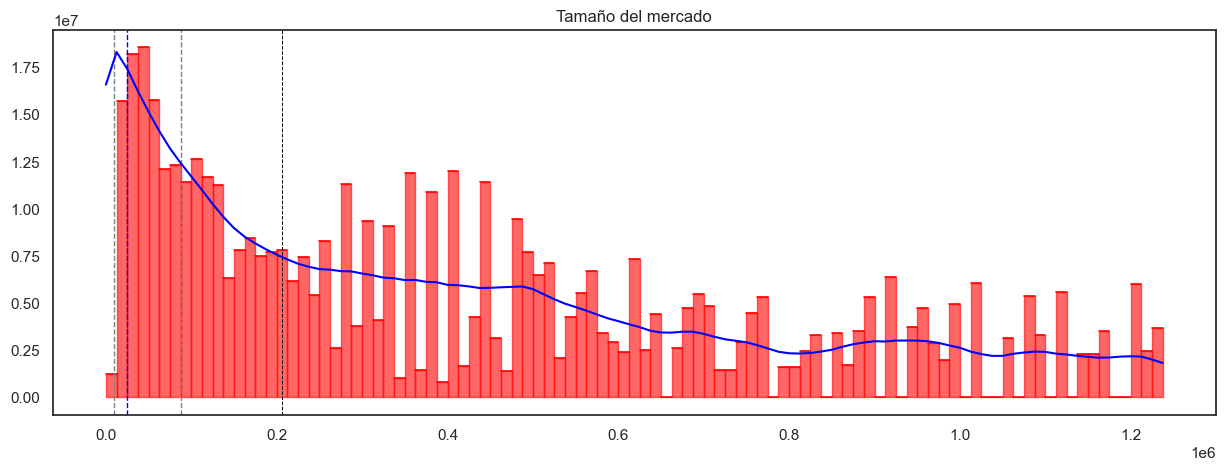

In [78]:
plt.figure(figsize=(15, 5))

for i in range(len(x_tamaño)):
    try:
        plt.plot([x_tamaño[:int(10000/tporK)][i], x_tamaño[:int(10000/tporK)][i+1]], [y_tamaño[:int(10000/porK)][i], y_tamaño[:int(10000/tporK)][i]], color='red', linewidth=1.2)
        plt.fill_between([x_tamaño[:int(10000/porK)][i], x_tamaño[:int(10000/tporK)][i+1]], [y_tamaño[:int(10000/tporK)][i], y_tamaño[:int(10000/tporK)][i]], color='red', alpha=0.6)
    except:
        break


plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)  
plt.axvline(Q3, linestyle='--', color='grey', linewidth=1) 
plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)

sns.lineplot(x=x_tamaño[:int(10000/tporK)], y=y_tval[:int(10000/tporK)], color='blue')


plt.axvline(csup, linestyle='--', color='black', linewidth=0.7) 

plt.title('Tamaño del mercado')

In [49]:
window_size = int(4000 / porK)

def update_graph(precio=0):
    plt.figure(figsize=(15, 5))
    
    start_index=0
    for i,p in enumerate(x_precios):
        if p>precio:
            break
        start_index=i
        
    end_index = min(start_index + window_size, len(x_precios))
    
    plt.fill_between([Q1, Q3], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='lightblue', alpha=0.6)

    for i in range(start_index, end_index - 1):
        plt.plot([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='red', linewidth=0.8)
        plt.fill_between([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='orange', alpha=0.8)

    sns.lineplot(x=x_precios[start_index:end_index], y=y_val[start_index:end_index], color='brown')

    plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)
    plt.axvline(Q3, linestyle='--', color='grey', linewidth=1)
    plt.axvline(QM, linestyle='--', color='red', linewidth=1.7)
    plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)
    plt.axvline(csup, linestyle='--', color='black', linewidth=0.7)

    if end_index < len(x_precios):
        plt.fill_between([csup, x_precios[end_index - 1]], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='grey', alpha=0.7)

    plt.title('Distribución de la variable precio de venta')
    plt.xlim(x_precios[start_index], x_precios[end_index-1])
    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(
    min=0, 
    max=max_pre - 500000,
    step=1, 
    value=0,
    description='Inicio',
    layout=widgets.Layout(width='98%')  
)

ui = VBox([widgets.interactive_output(update_graph, {'precio': slider}), slider])
display(ui)

In [80]:
def update_graph(precio=0):
    plt.figure(figsize=(15, 8))
    
    start_index_precio = next((i for i, p in enumerate(x_precios) if p > precio), len(x_precios) - 1)-1
    end_index_precio = min(next((i for i, p in enumerate(x_precios) if p > precio+500000), len(x_precios) - 1), len(x_precios))
    
    plt.subplot(2, 1, 1)
    plt.fill_between([Q1, Q3], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='lightblue', alpha=0.6)
    for i in range(start_index_precio, end_index_precio - 1):
        plt.plot([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='red', linewidth=0.8)
        plt.fill_between([x_precios[i], x_precios[i+1]], [y_precios[i], y_precios[i]], color='orange', alpha=0.8)

    sns.lineplot(x=x_precios[start_index_precio:end_index_precio], y=y_val[start_index_precio:end_index_precio], color='brown')
    plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)
    plt.axvline(Q3, linestyle='--', color='grey', linewidth=1)
    plt.axvline(QM, linestyle='--', color='red', linewidth=1.7)
    plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)
    plt.axvline(csup, linestyle='--', color='black', linewidth=0.7)
    plt.title('Precio de venta')
    plt.xlim(x_precios[start_index_precio], x_precios[end_index_precio-1])
    if end_index_precio < len(x_precios):
        plt.fill_between([csup, x_precios[end_index_precio - 1]], [max(y_precios) * 1.1, max(y_precios) * 1.1], color='grey', alpha=0.7)

    # Graficar el segundo gráfico
    start_index_tamaño = next((i for i, p in enumerate(x_tamaño) if p > precio), len(x_tamaño) - 1)-1
    end_index_tamaño = min(next((i for i, p in enumerate(x_tamaño) if p > precio+500000), len(x_tamaño) - 1), len(x_tamaño))
    
    plt.subplot(2, 1, 2)
    for i in range(start_index_tamaño, end_index_tamaño - 1):
        plt.plot([x_tamaño[i], x_tamaño[i+1]], [y_tamaño[i], y_tamaño[i]], color='red', linewidth=1.2)
        plt.fill_between([x_tamaño[i], x_tamaño[i+1]], [y_tamaño[i], y_tamaño[i]], color='red', alpha=0.6)

    plt.axvline(Q1, linestyle='--', color='grey', linewidth=1)
    plt.axvline(Q3, linestyle='--', color='grey', linewidth=1)
    plt.axvline(Qm, linestyle='--', color='blue', linewidth=1)
    plt.axvline(csup, linestyle='--', color='black', linewidth=0.7)
    plt.title('Tamaño del mercado')
    plt.xlim(x_tamaño[start_index_tamaño], x_tamaño[end_index_tamaño-1])
    if end_index_tamaño < len(x_tamaño):
        plt.fill_between([csup, x_tamaño[end_index_tamaño - 1]], [max(y_tamaño) * 1.1, max(y_tamaño) * 1.1], color='grey', alpha=0.5)
    sns.lineplot(x=x_tamaño[start_index_tamaño:end_index_tamaño], y=y_tval[start_index_tamaño:end_index_tamaño], color='brown')
    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(
    min=0, 
    max=max_pre - 500000,
    step=10000, 
    value=0,
    description='Inicio',
    layout=widgets.Layout(width='98%')  
)

ui = VBox([widgets.interactive_output(update_graph, {'precio': slider}), slider])
display(ui)

----------------------------------------------

In [79]:
df['logP'] = None
logprecios=[]

for i,obra in df.iterrows():
    if df.loc[i,'Vendido'] == 1:
        df.loc[i,'logP'] = math.log(obra['Precio_num'])
        logprecios.append(math.log(obra['Precio_num']))


logprecios=sorted(logprecios) 


min_log_pre = int(logprecios[0]) 
max_log_pre = int(logprecios[-1])

x_logprecios = []
y_logprecios = []


lpaso = min_log_pre/ 17

x = min_log_pre - 2*lpaso

while logprecios:
    
    logprecio=logprecios[0] 
    num=0
    
    while logprecio <= x + lpaso:
        
        num += 1
        try:
            logprecio=logprecios.pop(0)
        except:
            break

    y_logprecios.append(num)
    x_logprecios.append(x)
    
    x += lpaso
    
    
print(y_logprecios)

[0, 0, 0, 0, 0, 4, 0, 0, 6, 0, 10, 7, 19, 35, 52, 47, 63, 96, 87, 164, 174, 237, 280, 256, 330, 379, 309, 338, 370, 331, 316, 283, 176, 259, 201, 139, 134, 120, 134, 107, 112, 72, 55, 52, 36, 27, 26, 28, 22, 24, 12, 13, 5, 11, 4, 3, 0, 4, 5, 0, 4, 0, 4]


In [52]:
y_de_trabajo = y_logprecios

rep=1
maxrep=6

coefs=[]
for L in range(1, maxrep + 2):
    coefs.append([(sum( 1/ ( (n + k)**2 ) for k in range( 0, L - n + 1 )) / sum( 1/j for j in range(1, L + 1))) for n in range(1, L + 1) ])

while rep <= maxrep:
    
    L = rep
    y_logval = []
   
    for i, x in enumerate(x_logprecios):
        
        valsD = []
        valsI = []
        
        for n in range(1, L+1):
            
            try:
                valsD.append(y_de_trabajo[i+n])
            except:
                pass
            
            try:
                valsI.append(y_de_trabajo[i-n])
            except:
                pass
            
        LD = len(valsD)
        LI = len(valsI)
        vals = []
        
        for j,val in enumerate(valsI):
            vals.append(val*coefs[LI-1][j] * (LD/(LD + LI)))
            
        for j,val in enumerate(valsD):
            vals.append(val*coefs[LD-1][j] * (LI/(LD + LI)))
            
        y_logval.append((np.array(vals).sum()*(1/rep) + y_de_trabajo[i]*((rep-1)/rep)))
        
    y_de_trabajo = y_logval
    
    rep += 1

print(y_logval)

[np.float64(0.7479167800753111), np.float64(0.576279317814296), np.float64(0.49831563486015873), np.float64(0.6708879347493644), np.float64(1.0313313733675396), np.float64(1.3657401614823237), np.float64(2.018123744616245), np.float64(2.913622581200422), np.float64(4.308617392245182), np.float64(6.99716371126738), np.float64(10.770669815028707), np.float64(17.001873015409643), np.float64(25.265321306538475), np.float64(35.348531059399335), np.float64(46.71329013301107), np.float64(60.30846334261359), np.float64(76.42146632824681), np.float64(96.72924029445313), np.float64(123.64118436233142), np.float64(153.5928429851246), np.float64(188.43554047832782), np.float64(221.81055391775195), np.float64(253.0707901577048), np.float64(282.5800177670542), np.float64(304.7926646040805), np.float64(320.40701735979746), np.float64(331.0441813223848), np.float64(332.5578346498756), np.float64(327.56018812290796), np.float64(315.84970629737427), np.float64(294.376163841244), np.float64(267.916119211

In [53]:
Qlog1=df[df['Vendido']==1]['logP'].quantile(0.25)
Qlog3=df[df['Vendido']==1]['logP'].quantile(0.75)
QlogM=df[df['Vendido']==1]['logP'].mean()
IQRlog=Qlog3-Qlog1
cloginf=Qlog1 - 1.5*IQRlog
clogsup=Qlog3 + 1.5*IQRlog

Text(0.5, 1.0, 'Distribución del logaritmo del precio')

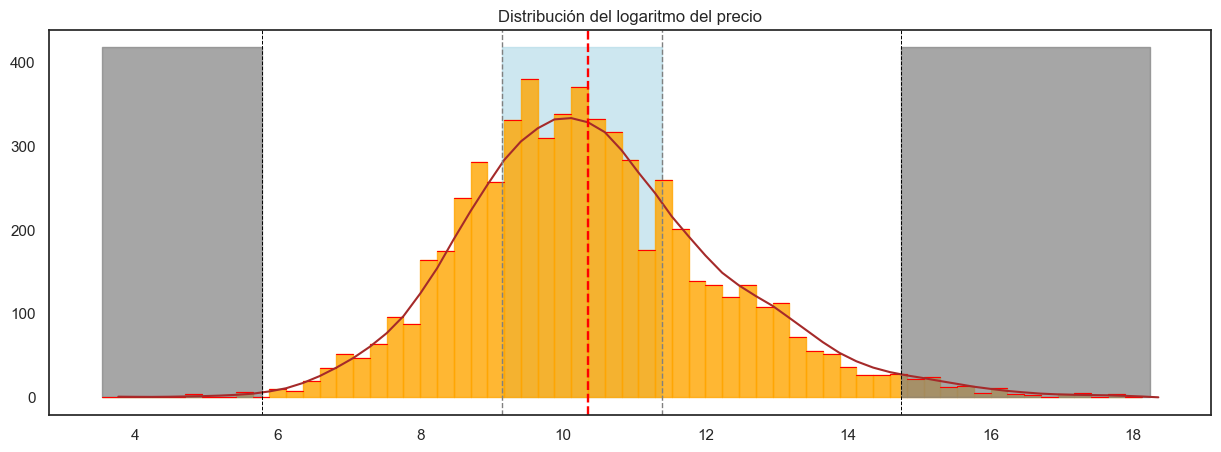

In [54]:
plt.figure(figsize=(15, 5))

plt.fill_between([Qlog1, Qlog3], [max(y_logprecios)*1.1,max(y_logprecios)*1.1], color='lightblue', alpha=0.6)

for i,x in enumerate(x_logprecios):
    
    try:
        plt.plot([x_logprecios[i], x_logprecios[i+1]], [y_logprecios[i], y_logprecios[i]], color='red', linewidth=0.8)
        plt.fill_between([x_logprecios[i], x_logprecios[i+1]], [y_logprecios[i], y_logprecios[i]], color='orange', alpha=0.8)
    except:
        break


sns.lineplot(x=[equis + lpaso for equis in x_logprecios], y=y_logval, color='brown')


plt.axvline(Qlog1, linestyle='--', color='grey', linewidth=1)  
plt.axvline(Qlog3, linestyle='--', color='grey', linewidth=1) 
plt.axvline(QlogM, linestyle='--', color='red', linewidth=1.7) 

plt.fill_between([min_log_pre - 2*lpaso,cloginf], [max(y_logprecios)*1.1,max(y_logprecios)*1.1], color='grey', alpha=0.7)
plt.fill_between([clogsup, max_log_pre + lpaso], [max(y_logprecios)*1.1,max(y_logprecios)*1.1], color='grey', alpha=0.7)



plt.axvline(cloginf, linestyle='--', color='black', linewidth=0.7) 
plt.axvline(clogsup, linestyle='--', color='black', linewidth=0.7) 

# Configuración adicional de la gráfica
plt.title('Distribución del logaritmo del precio')


In [115]:
df['Prc_atípico'] = None
for i, obra in df.iterrows():
    if obra['Vendido']==1:
        if obra['logP'] > clogsup or obra['logP'] < cloginf:
            df.loc[i,'Prc_atípico']= '2'
        elif obra['Precio_num'] > csup:
            df.loc[i,'Prc_atípico']= '1'
        else:
            df.loc[i,'Prc_atípico']= '0'
    else:
        df.loc[i,'Prc_atípico']= '0'

In [116]:
df.to_csv('..\Datos\datos_subastas_procesado.csv', encoding='utf-8', index=False)

In [113]:
def representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, datoselegidos,intervalo_años):

    graf_Años = pd.DataFrame(columns=['A', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioMv', 'PrecioMs'])
    min_año = int(df['Año de nacimiento'].min())
    max_año = int(df['Año de nacimiento'].max()) 
    
    rango=(intervalo_años[1]-intervalo_años[0])/15
    rango=int(rango)
    
    Años = range(intervalo_años[0] + rango, intervalo_años[1] - rango + 1, (int(rango/8) if rango >= 8 else 1))
    
    idxFilas = [list(df.loc[(abs(df['Año de nacimiento'] - año) <= rango) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos)) & 
                             (df['Prc_atípico'].isin(datoselegidos))].index) for año in Años]
    
    
    idFilas = [list(df.loc[(df['Año de nacimiento'] == año) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos)) & 
                             (df['Prc_atípico'].isin(datoselegidos))].index) for año in range(intervalo_años[0], intervalo_años[1] + 1)]
    
    TObras = []
    TVentas = []   
    PrecioMv = [] 
    PrecioMs = []    
    MaxEst = []    
    MinEst = []
    
    graf_Años['Año'] = Años
    
    for i, año in enumerate(graf_Años['Año']):
        
        TObras.append((len(idxFilas[i]) if len(idxFilas[i]) > 0 else 1)/(2*rango))
        TVentas.append((sum(df.loc[j, 'Vendido'] for j in idxFilas[i]) if sum(df.loc[j, 'Vendido'] for j in idxFilas[i]) > 0 else 1)/(2*rango))
        
        PrecioMv.append(round(sum((df.loc[j, 'Precio_num'] if df.loc[j, 'Vendido']==1 else 0) for j in idxFilas[i]) /(2*rango* TVentas[i]), 2) if TVentas[i] > 0 else 0 )
        PrecioMs.append(round(sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)        
        MaxEst.append(round(sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        MinEst.append(round(sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        
    graf_Años['TObras'] = TObras
    graf_Años['TVentas'] = TVentas
    graf_Años['PrecioMv'] = PrecioMv
    graf_Años['PrecioMs'] = PrecioMs
    graf_Años['MaxEst Medio'] = MaxEst
    graf_Años['MinEst Medio'] = MinEst

    TotalObras = sum(TObras) 
    TotalVentas = sum(TVentas)  
    TotalObrasABS = sum(len(idFilas[i]) for i, año in enumerate(idFilas))
    TotalVentasABS = sum(sum([df.loc[j, 'Vendido'] for j in idFilas[i]]) for i, año in enumerate(idFilas))
    
    Porcentaje = round((TotalVentasABS/TotalObrasABS) * 100, 2) if TotalObrasABS > 0 else 0
    
    PrecioMvGlobal = sum((PrecioMv[i] * TVentas[i] for i in range(len(Años)))) / TotalVentas if TotalVentas > 0 else 0
    PrecioMsGlobal = sum((PrecioMs[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMaxMGlobal = sum((MaxEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMinMGlobal = sum((MinEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    

    with graf_output2:
        graf_output2.clear_output(wait=True)
        
        sns.set_theme(style="white")

        # Crear figura y ejes para dos subgráficos
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 9))

        # Primer gráfico
        axes[0].set_title("Número de obras", fontsize=20, fontweight='bold', loc='left', pad=30)
        sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
        sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

        # Rellenar área entre líneas
        axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15)
        axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.3)

        # Configuración del gráfico
        axes[0].set_xlabel("")
        axes[0].set_ylabel("")
        yticks = axes[0].get_yticks()
        axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])
        axes[0].grid(False)
        axes[0].spines['bottom'].set_color('black')
        axes[0].spines['left'].set_color('black')
        
        # Segundo gráfico
        axes[1].set_title("Precios medios y valores estimados", fontsize=20, fontweight='bold', loc='left', pad=30)

        sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMv", data=graf_Años, label='Precio Medio por venta', color='red', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMs", data=graf_Años, label='medio por subasta', color='blue', ax=axes[1], linewidth=0.7, linestyle='--')
        
        sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])

        
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], color='brown', linewidth=0.5, linestyle='--')
        axes[1].plot([min_año - 10, max_año + 10], [PrecioMvGlobal, PrecioMvGlobal], color='red', linewidth=0.8)
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='brown', linewidth=0.5, linestyle='--')
        
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between([min_año+30, max_año-29], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='limegreen', alpha=0.3)
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between(graf_Años['Año'], graf_Años['PrecioMv'], graf_Años['PrecioMs'], color='blue', alpha=0.3)
        
        axes[1].set_xlim(intervalo_años[0], intervalo_años[1])
        axes[1].set_xlabel("")
        axes[1].set_ylabel("")
        axes[1].set_yticks([graf_Años['PrecioMv'].quantile(0.25), PrecioMvGlobal ,graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].max() ])
        axes[1].grid(False)
        axes[1].spines['bottom'].set_color('black')
        axes[1].spines['left'].set_color('black')

        plt.tight_layout(h_pad=4)
        plt.show()
        
    with totales_output1:
        totales_output1.clear_output(wait=True)
        
        fig, axe = plt.subplots(nrows=4, ncols=1, figsize=(3, 4))
        axe[0].set_title("Totales:", fontsize=20, color='black', fontweight='bold', loc='center', pad=10)
        axe[0].spines['top'].set_visible(False)
        axe[0].spines['bottom'].set_visible(False)
        axe[0].spines['left'].set_visible(False)
        axe[0].spines['right'].set_visible(False)
        axe[0].set_xticks([])
        axe[0].set_yticks([])

        axe[1].set_title(f"Subastadas: {TotalObrasABS}", fontsize=15, color='blue', fontweight='bold', loc='center', pad=10)
        axe[1].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[1].set_ylim(0,1)
        
        axe[1].spines['top'].set_visible(False)
        axe[1].spines['bottom'].set_visible(False)
        axe[1].spines['left'].set_visible(False)
        axe[1].spines['right'].set_visible(False)
        axe[1].set_xticks([])
        axe[1].set_yticks([])


        axe[2].set_title(f"Vendidas: {TotalVentasABS}", fontsize=15, color='red', fontweight='bold', loc='center', pad=10)
        axe[2].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[2].set_ylim(0,1)
        
        axe[2].spines['top'].set_visible(False)
        axe[2].spines['bottom'].set_visible(False)
        axe[2].spines['left'].set_visible(False)
        axe[2].spines['right'].set_visible(False)
        axe[2].set_xticks([])
        axe[2].set_yticks([])

        axe[3].set_title( f"{Porcentaje} %", fontsize=20, color='purple', fontweight='bold', loc='center', pad=10)
        axe[3].plot([0, 1], [1,1], color='black', linewidth=5)
        axe[3].set_ylim(0,1)
        axe[3].spines['top'].set_visible(False)
        axe[3].spines['bottom'].set_visible(False)
        axe[3].spines['left'].set_visible(False)
        axe[3].spines['right'].set_visible(False)
        axe[3].set_xticks([])
        axe[3].set_yticks([])


        plt.tight_layout(h_pad=1)
        plt.show()
        
        
    with totales_output2:
        totales_output2.clear_output(wait=True)
        
        fig, ax1 = plt.subplots(figsize=(3, 4.2))
        ax1.set_title("Promedios globales", fontsize=16, fontweight='bold', loc='center', pad=40)

        # Línea central vertical más gruesa usando plt.plot para ajustar linewidth
        ax1.plot([1.3, 1.3], [EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15], color='black', linewidth=1)

        # Líneas horizontales
        sns.lineplot(x=[1, 1.6], y=[PrecioMvGlobal, PrecioMvGlobal], color='red', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMaxMGlobal, EstMaxMGlobal], color='orange', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMinMGlobal, EstMinMGlobal], color='orange', ax=ax1)

        # Áreas sombreadas
        ax1.fill_between([1.15, 1.45], [EstMinMGlobal, EstMinMGlobal], [EstMaxMGlobal, EstMaxMGlobal], color='orange', alpha=0.4)
        ax1.fill_between([1, 1.6], [PrecioMsGlobal, PrecioMsGlobal], [PrecioMvGlobal, PrecioMvGlobal], color='blue', alpha=0.2)

        ax1.grid(False)

        # Configurar los ejes
        ax1.set_xlim(1, 1.6)
        ax1.set_ylim(min(EstMinMGlobal,PrecioMvGlobal) * 0.75, max(PrecioMvGlobal, EstMaxMGlobal) * 1.15)

        # Ajustar visibilidad de los bordes
        ax1.spines['top'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        # Personalizar el spine derecho
        ax1.spines['right'].set_linestyle('-.')
        ax1.spines['right'].set_linewidth(0.6)
        ax1.spines['left'].set_linestyle('-.')
        ax1.spines['left'].set_linewidth(0.6)

        ax1.set_xticks([])
        ax1.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])
        ax1.set_yticklabels(['Est. Min', 'Est. Max', 'Precio'])
        
        ax2 = ax1.twinx()
        ax2.set_ylim(EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15)

        ax2.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])

        plt.tight_layout()
        plt.show()

# Crear widgets de selección de países y géneros
Paises = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Paises Bajos', 'Francia', 'Reino Unido', 'Italia', 'Austria', 'Suiza', 'Desconocido']
Generos = df['Género'].unique()
Datos = df['Prc_atípico'].unique()

# Widgets de selección de países
selectorespais = {pais: Checkbox(value=True, description=pais, layout=Layout(width='auto')) for pais in Paises}
# Widgets de selección de géneros
selectoresgeneros = {genero: Checkbox(value=True, description=genero, layout=Layout(width='auto')) for genero in Generos}

selectoresdatos = {dato: Checkbox(value=True, description=dato, layout=Layout(width='auto')) for dato in Datos}

year_range_slider1 = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='70%')  # Aquí puedes ajustar el ancho del slider
)

# Crear etiquetas estilizadas
etiqueta_pais = HTML(value="<h2 style='text-align:center; font-weight:bold;'>País</h2>")
etiqueta_genero = HTML(value="<h2 style='text-align:center; font-weight:bold;'>Género</h2>")
etiqueta_datos = HTML(value="<h3 style='text-align:center; font-weight:bold;'>Tipo de dato</h3>")


# Contenedor para filtros de país con la etiqueta estilizada
columnapais = VBox([etiqueta_pais] + list(selectorespais.values()), layout=Layout(margin='20px 0 10px 0px' ))

# Contenedor para filtros de género con la etiqueta estilizada
columnagenero = VBox([etiqueta_genero] + list(selectoresgeneros.values()), layout=Layout(margin='0 0 30px 0px' ))

cajondatos =HBox([etiqueta_datos, VBox(list(selectoresdatos.values()))], layout=Layout(margin='0px 50px 0px 50px' )) 

# Crear un contenedor para los filtros organizados en dos columnas
Cajonfiltros = VBox([columnapais, columnagenero], layout=Layout(margin='10px 30px 30px 0px' ))

# Crear un contenedor de salida para el gráfico con margen
graf_output2 = Output(layout=Layout(margin='10px 0 20px 10px'))  # Ajusta el margen izquierdo a tu gusto

totales_output1 = Output(layout=Layout(margin='0 0 10px 0'))
totales_output2 = Output(layout=Layout(margin='10px 0 0 0'))

totales_output = VBox([totales_output1, totales_output2], layout=Layout(margin='50px 5px 20px 5px' ))

cajagrafos = HBox([graf_output2,totales_output])

cajafiltros2 = HBox([year_range_slider1, cajondatos], layout=Layout(margin='10px 30px 30px 0px' ))

def update_plot2(*args):
    paiseselegidos = [pais for pais, checkbox in selectorespais.items() if checkbox.value]
    generoselegidos = [genero for genero, checkbox in selectoresgeneros.items() if checkbox.value]
    datoselegidos = [dato for dato, checkbox in selectoresdatos.items() if checkbox.value]
    representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, datoselegidos ,year_range_slider1.value)
    
for checkbox in selectorespais.values():
    checkbox.observe(update_plot2, 'value')

for checkbox in selectoresgeneros.values():
    checkbox.observe(update_plot2, 'value')
for checkbox in selectoresdatos.values():
    checkbox.observe(update_plot2, 'value')

# Conectar el evento del slider con la función de actualización
year_range_slider1.observe(lambda change: update_plot2(year_range_slider1.value), names='value')


cajacentral = VBox([cajagrafos, cajafiltros2 ])



# Mostrar los widgets y el gráfico
display(HBox([Cajonfiltros, cajacentral]))

update_plot2()


In [58]:
est_M=[]
est_m=[]

for i,obra in df.iterrows():

    est_m.append(obra['Mínimo estimado'])
    est_M.append(obra['Máximo estimado'])

est_m=sorted(est_m) 
est_m=sorted(est_m) 


Total=len(precios) 

min_pre = int(precios[0]) 
max_pre = int(precios[-1])

x_precios = []
y_precios = []

porK = 15

paso = min_pre * porK

x = 0

while precios:
    
    precio=precios[0] 
    num=0
    
    while precio <= x + paso:
        
        num += 1
        try:
            precio=precios.pop(0)
        except:
            break

    y_precios.append(num)
    x_precios.append(x)
    
    x += paso

IndexError: list index out of range

In [ ]:
df.columns